# Quick Sort

- **Pivot을 설정하고, 그 기준보다 큰 데이터와 작은 데이터의 위치를 SWAP 하는 알고리즘**


- 첫번째 값을 피벗으로 설정


- 피벗 다음부터 피벗보다 큰 값 선택, 맨끝에서 부터 피벗 보다 작은 값을 선택 


- 선택된 두 값을 SWAP 을 반복


- 선택된 두 값의 위치가 엇갈리는 경우, 피벗 과 작은 데이터 SWAP 하면서 **피벗을 기준으로 분활 완료**


- 피벗기준 왼쪽 데이터 묶음 정렬, 오른쪽 데이터 묶음 정렬 수행 **재귀**



퀵 정렬은 n개의 데이터를 정렬할 때, 최악의 경우에는 $O(n^2)$번의 비교를 수행하고, 평균적으로 $O(n log n)$번의 비교를 수행한다.



## Src - Quick_Sort

In [1]:
def quick_sort(lst, start, end):
    
    if start >= end: # 원소가 1개인 경우 종료
        return
    
    pivot = start # 피벗은 첫 번째 원소
    left = start + 1
    right = end
    
    while(left <= right):
        
        # 피벗보다 큰 데이터를 찾을 때까지 반복 선형 탐색
        while(left <= end and lst[left] <= lst[pivot]):
            left += 1
            
        # 피벗보다 작은 데이터를 찾을 때까지 반복 선형 탐색
        while(right > start and lst[right] >= lst[pivot]):
            right -= 1
            
        if(left > right): # 엇갈렸다면 작은 데이터와 피벗을 교체
            lst[right], lst[pivot] = lst[pivot], lst[right]
            
        else: # 엇갈리지 않았다면 작은 데이터와 큰 데이터를 교체
            lst[left], lst[right] = lst[right], lst[left]
            
    # 분할 이후 왼쪽 부분과 오른쪽 부분에서 각각 정렬 수행
    quick_sort(lst, start, right - 1)
    quick_sort(lst, right + 1, end)

In [2]:
data = [5, 4, 3, 2, 1]

quick_sort(data, 0, len(data)-1)

print(data)

[1, 2, 3, 4, 5]


## Create dataset

In [3]:
import random
    
def create_input_data(lst):
    
    data_asc = sorted(lst).copy()
    
    random.shuffle(lst)
    rdm_data = lst
    
    data_desc = sorted(lst,reverse = True).copy()


    return data_asc, rdm_data, data_desc

data = []

for i in range(5,20 + 1):
    data.append(2**i)

# list를 value로 가지는 Tuple
data = create_input_data(data)

In [4]:
for i in range(3):
    print("data {0} : {1}".format(i,data[i]),end = '\n\n')

data 0 : [32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288, 1048576]

data 1 : [1048576, 64, 32, 2048, 262144, 512, 131072, 1024, 16384, 65536, 524288, 4096, 32768, 256, 8192, 128]

data 2 : [1048576, 524288, 262144, 131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64, 32]



## 수행시간 측정

In [5]:
import time

start_time0 = time.time() # 수행시간 측정
quick_sort(data[0], 0, len(data[0])-1)
end_time0 = time.time() # 측정 종료


start_time1 = time.time() # 수행시간 측정
quick_sort(data[1], 0, len(data[1])-1)
end_time1 = time.time() # 측정 종료


start_time2 = time.time() # 수행시간 측정
quick_sort(data[2], 0, len(data[2])-1)
end_time2 = time.time() # 측정 종료


print("정렬된 데이터 :", end_time0 - start_time0) # 수행 시간 출력

print("랜덤 정렬된 데이터 :", end_time1 - start_time1) # 수행 시간 출력

print("역정렬된 데이터 :", end_time2 - start_time2) # 수행 시간 출력


process_time_asc = end_time0 - start_time0

process_time_rdm = end_time1 - start_time1

process_time_desc = end_time2 - start_time2



정렬된 데이터 : 0.00011205673217773438
랜덤 정렬된 데이터 : 0.0001010894775390625
역정렬된 데이터 : 9.107589721679688e-05


## Ploting

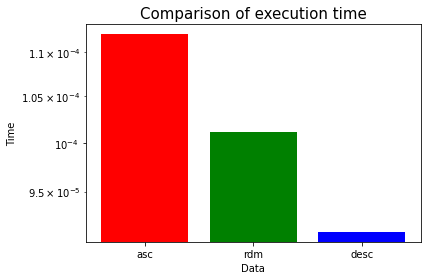

In [6]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(3)


values = [process_time_asc,process_time_rdm, process_time_desc]

plt.bar(x, values,color = ['r', 'g', 'b'])

xticks = ['asc', 'rdm', 'desc']
plt.xticks(x, xticks)

plt.xlabel('Data')
plt.ylabel('Time')
plt.yscale('log')

plt.title('Comparison of execution time', fontsize=15)

plt.show()

## result

- **역 정렬 데이터, 랜덤 정렬된 데이터, 정렬된 데이터 순으로 빠르게 정렬 되었습니다.**

## Quicksort Applications

Quicksort algorithm is used when

- the programming language is good for recursion


- time complexity matters


- space complexity matters

## etc - Quick_Sort 리스트 슬라이싱 병합

In [8]:
def quick_sort_s(lst):
    
    # 리스트가 하나 이하의 원소만을 담고 있다면 종료
    if len(lst) <= 1:
        return lst

    pivot = lst[0] # 피벗은 첫 번째 원소
    tail = lst[1:] # 피벗을 제외한 리스트

    left_side = [x for x in tail if x <= pivot] # 분할된 왼쪽 부분
    right_side = [x for x in tail if x > pivot] # 분할된 오른쪽 부분

    # 분할 이후 왼쪽 부분과 오른쪽 부분에서 각각 정렬을 수행하고, 전체 리스트를 반환
    
    return quick_sort_s(left_side) + [pivot] + quick_sort_s(right_side)


In [9]:
lst = [5, 7, 9, 0, 3, 1, 6, 2, 4, 8]
quick_sort_s(lst)
print(lst)

[5, 7, 9, 0, 3, 1, 6, 2, 4, 8]
